In [1]:
# Library untuk pengolahan data
import pandas as pd
import numpy as np

# library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk model linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
# load data dan menampilkan data
df = pd.read_csv('Dataset CCV 5 - Supervised Learning Regression.csv')
df.head()

,Day,Diabetasol Coklat 1 kg,Fitbar Multigrain raisin 22 gram,Hydro Coco Original 500 ml,Slim & Fit Milk 312 gr,Daily Sales
0,1,7165158.0,115718.0,747417,7131950.0,20100380
1,2,11091106.0,302774.0,531021,4568946.0,19923983
2,3,3927138.0,150366.0,66812,2321753.0,10688946
3,4,1155500.0,74752.0,436916,NaN,4993264
4,5,6007919.0,370528.0,202243,3764485.0,14853006


In [4]:
# mendapatkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Day                               31 non-null     int64  
 1   Diabetasol Coklat 1 kg            30 non-null     float64
 2   Fitbar Multigrain raisin 22 gram  30 non-null     float64
 3   Hydro Coco Original 500 ml        31 non-null     int64  
 4   Slim & Fit Milk 312 gr            28 non-null     float64
 5   Daily Sales                       31 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 1.6 KB


<Figure size 1200x500 with 0 Axes>

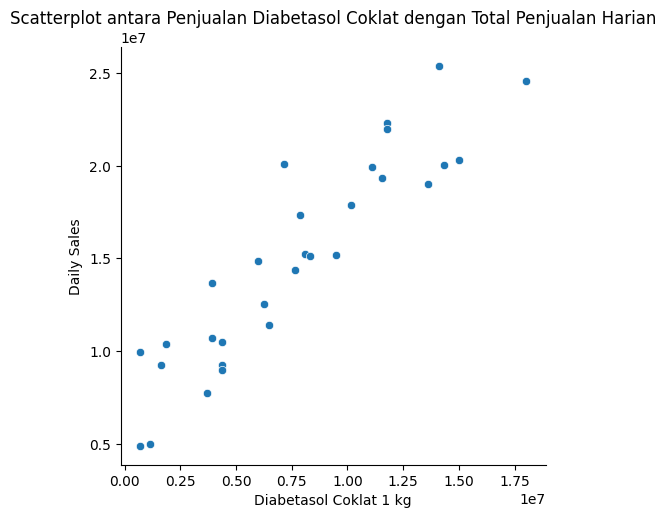

In [6]:
# membuat visualisasi sebaran data antara variable dependen salary dengan variable independen years menggunakan grafik scatterplot
plt.figure(figsize=(12,5))
sns.pairplot(df, x_vars=['Diabetasol Coklat 1 kg'], y_vars=['Daily Sales'], height=5, kind='scatter')
plt.xlabel('Diabetasol Coklat 1 kg')
plt.ylabel('Daily Sales')
plt.title('Scatterplot antara Penjualan Diabetasol Coklat dengan Total Penjualan Harian')
plt.show()

In [8]:
df.dropna(subset = 'Diabetasol Coklat 1 kg', inplace = True)

X = df['Diabetasol Coklat 1 kg']
X.head()

0     7165158.0
1    11091106.0
2     3927138.0
3     1155500.0
4     6007919.0
Name: Diabetasol Coklat 1 kg, dtype: float64

In [9]:
y = df['Daily Sales']
y.head()

0    20100380
1    19923983
2    10688946
3     4993264
4    14853006
Name: Daily Sales, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)


In [12]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [13]:
X_train = X_train.reshape(X_train.shape[0],1)
X_test = X_test.reshape(X_test.shape[0],1)

In [14]:
# menyesuaikan garis regresi dengan sebaran data (fit)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [15]:
# model melakukan prediksi
y_pred = lr.predict(X_test)

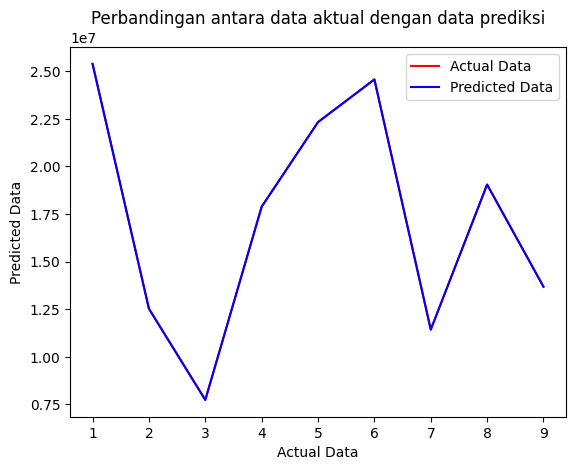

In [20]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c, y_test, color='r', linestyle='-', label='Actual Data')
plt.plot(c, y_test, color='b', linestyle='-', label= 'Predicted Data')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.title('Perbandingan antara data aktual dengan data prediksi')
plt.show()

In [21]:
# metriks untuk evaluasi model
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
#perhitungan mean square error
mse = mean_squared_error(y_test, y_pred)
print('mean squared error', mse)


mean squared error 5646943705294.958


In [23]:
# Intercept and coeff of the line
print('Intercept of the model:', lr.intercept_)
print('Coefficient of the line:', lr.coef_)

Intercept of the model: 6728389.623898853
Coefficient of the line: [1.0712553]
